# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primeramente procedemos a leer los archivos csv.
Al verlos podemos observar que estan separados por ";"
Todos los archivos tenian el mismo separador, asi que tendremos que agragar el parametro sep= para que queden como queremos y sean faciles de leer.
Adicionalmente a eso podemos ver algunos valores ausentes que debemos solucionar mas adelante.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# leer conjuntos de datos en los DataFrames
data_instacart_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
data_products = pd.read_csv("/datasets/products.csv", sep=";")
data_aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
data_departaments = pd.read_csv("/datasets/departments.csv", sep=";")
data_orders_products = pd.read_csv("/datasets/order_products.csv", sep=";")

In [3]:
# mostrar información del DataFrame
data_instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
data_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
data_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
data_departaments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
data_orders_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones

Luego de usar el parametro sep= en read_csv hemos podido vizualizar los datos de la forma adecuada.
Hemos descubierto que en data_instacart_orders tenemos algunos valores ausentes en la fila llamada "days_since_prior_order"
y en el conjunto de datos llamado data_orders_products parece que existe un problema ya que con info no me dice cuantos datos hay en cada fila a pesar de que indica que tiene 4545007 en total.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.


utilicé duplicated con sum para ver si habia valores duplicados y el resultado fue cero.


## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
data_instacart_orders.duplicated().sum()


15

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si habian duplicados y pudimos ver en el siguiente paso que todos los duplicados se encontraban entre la columna de "order_dow" y "order_hour_of_day" 

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(data_instacart_orders[(data_instacart_orders["order_dow"] == 3) & (data_instacart_orders["order_hour_of_day"] == 2)].duplicated().sum())
data_instacart_orders[(data_instacart_orders["order_dow"] == 3) & (data_instacart_orders["order_hour_of_day"] == 2)]

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Luego de filtrar por dia y por hora nos damos cuenta de que los duplicados se encuentran dentro de este rango(dia miercoles, hora 2am).

In [10]:
# Elimina los pedidos duplicados
dt_insta_orders = data_instacart_orders.drop_duplicates().reset_index(drop
= True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
dt_insta_orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
dt_insta_orders["order_id"].duplicated().sum()



0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Hasta ahora hemos encontrado que el csv estaba separado por ";" y que tenia algunos valores duplicados.
Solucionamos estos errores con el metodo sep=, con duplicated.sum() para buscar los duplicados y con drop_duplicates() para eliminar los duplicados encontrados.


### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
data_products.duplicated().sum()

0

In [14]:
# Verifica únicamente si hay IDs duplicadas de productos
data_products["product_id"].duplicated().sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
data_products["product_name_upper"] = data_products["product_name"].str.upper()
data_products["product_name_upper"].duplicated().sum()

1361

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
data_products["product_name_upper"].dropna().duplicated().sum()

104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

A pesar de que vemos que no hay duplicados cuando aplicamos el duplicated al dataframe completo, si revisamos la columna product_name, encontramos 1361 duplicados. al parecer 104 son valores ausentes.


### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
data_departaments.duplicated().sum()

0

In [18]:
# Revisa únicamente si hay IDs duplicadas de productos
data_departaments["department_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este dataframe no hemos encontrado duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
data_aisles.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de productos
data_aisles["aisle_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

No hemos encontrado valores duplicados en este DataFrame

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
data_orders_products.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("valores duplicados de order_id:", data_orders_products["order_id"].duplicated().sum())
print("valores duplicados de product_id:", data_orders_products["product_id"].duplicated().sum())
print("valores duplicados de add_to_cart_order:", data_orders_products["add_to_cart_order"].duplicated().sum())
print("valores duplicados de reordered:", data_orders_products["reordered"].duplicated().sum())
print(" ")
print("Valores ausentes en la columna order_id:", data_orders_products["order_id"].isna().sum())
print("Valores ausentes en la columna product_id:", data_orders_products["product_id"].isna().sum())


valores duplicados de order_id: 4094961
valores duplicados de product_id: 4499434
valores duplicados de add_to_cart_order: 4544942
valores duplicados de reordered: 4545005
 
Valores ausentes en la columna order_id: 0
Valores ausentes en la columna product_id: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En este caso cuando ejecutamos el duplicated al DataFrame completo nos dice que no tiene duplicados, sin embargo, cuando lo aplicamos fila por fila aparecen muchisimos duplicados.
En las filas de add_to_cart_order y reordered es aceptable que esto ocurra, pero en las columnas de id no deberia pasar debido a que se supone que son valores unicos para identificar la orden o el producto.
Hicimos una verificacion extra para ver si estos datos repetidos se debian a valores ausentes pero el resultado ha sido cero.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
data_products["product_name_upper"].isna().sum()

1258

Describe brevemente cuáles son tus hallazgos.

se han encontrado 1258 valores ausentes en la columna product_name

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
(data_products["aisle_id"] == 100).isna().sum()

0

Describe brevemente cuáles son tus hallazgos.
Aparentemente los valores ausentes no estan relacionados con el pasillo de ID 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
(data_products["department_id"] == 21).isna().sum()

0

Describe brevemente cuáles son tus hallazgos.
Aparentemente no estan relacionados con el departamento con ID 21

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
data_products[(data_products["department_id"] == 21) & (data_products["aisle_id"] == 100)]

,product_id,product_name,aisle_id,department_id,product_name_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Describe brevemente cuáles son tus hallazgos.

En este caso podemos ver claramente que los valores ausentes efectivamente pertenecen a la columna product_name y estan relacionados con el pasillo 100 y el departamento 21

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
data_products["product_name_upper"] = data_products["product_name_upper"].fillna("UNKNOWN")
data_products["product_name_upper"].isna().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Hemos hecho varias busquedas hasta encontrar que los valores ausentes estaban relacionados con el pasillo de ID 100 y el departamento con ID 21. 
Usamos el metodo fillna() para sustituir los valores ausentes encontrados y hemos verificado nuevamente si efectibamente fueron eliminados los valores ausentes.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
dt_insta_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(dt_insta_orders.query("order_id == 1")[["days_since_prior_order", "order_id"]].isna().sum())

days_since_prior_order    0.0
order_id                  0.0
dtype: float64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Encontramos valores ausentes en la columna days_since_prior_order. luego verificamos si habia valores ausentes que no sean el primer pedido de cliente siendo el resultado cero. Quiere decir esto que ninguno de los valores ausentes es del primer pedido del cliente.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
data_orders_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("valor minimo:", data_orders_products["add_to_cart_order"].min())
print("valor maximo:", data_orders_products["add_to_cart_order"].max())

valor minimo: 1.0
valor maximo: 64.0


Describe brevemente cuáles son tus hallazgos.

tenemos valores ausentes en la columna add_to_cart_order y los valores minimos y maximos de esta columna son 1.0 y 64.0 respectivamente.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

id_nan_list = list(data_orders_products[data_orders_products["add_to_cart_order"].isnull()]["order_id"])
id_nan_list

[2449164,
 1968313,
 2926893,
 1717990,
 1959075,
 844733,
 61355,
 936852,
 264710,
 1717990,
 1564093,
 129627,
 264710,
 293169,
 2849370,
 1386261,
 3308010,
 903110,
 2136777,
 3347453,
 1888628,
 165801,
 2449164,
 2094761,
 3347453,
 1038146,
 2136777,
 2997021,
 844733,
 844733,
 2136777,
 813364,
 165801,
 2256933,
 171934,
 264710,
 2449164,
 2409109,
 3347453,
 813364,
 2926893,
 936852,
 1730767,
 1169835,
 733526,
 844733,
 293169,
 61355,
 903110,
 1968313,
 733526,
 2136777,
 2926893,
 404157,
 1386261,
 171934,
 3125735,
 747668,
 3308010,
 1169835,
 1800005,
 1961723,
 936852,
 2849370,
 3308010,
 61355,
 871281,
 1717990,
 813364,
 388234,
 61355,
 3125735,
 1959075,
 61355,
 3125735,
 1648217,
 171934,
 3125735,
 61355,
 1477139,
 1959075,
 1717990,
 1717990,
 61355,
 1717990,
 171934,
 1038146,
 3308010,
 3347453,
 102236,
 936852,
 171934,
 1730767,
 2926893,
 1021563,
 1832957,
 1959075,
 2256933,
 1968313,
 2721963,
 293169,
 102236,
 3125735,
 1959075,
 264710,


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
data_orders_products[data_orders_products['order_id'].isin(id_nan_list)].groupby("order_id")["product_id"].count().min()
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

65

Describe brevemente cuáles son tus hallazgos.

efectivamente todos los pedidos con valores ausentes tienen mas de 64 productos, exactamente 65

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
#print(data_orders_products["add_to_cart_order"].unique())
#data_orders_products["add_to_cart_order"].fillna(0, inplace=True)
#data_orders_products["add_to_cart_order"] = data_orders_products["add_to_cart_order"].astype("int")
#data_orders_products["add_to_cart_order"].sort_values(ascending=True).value_counts()

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Entonces siguiendo la recomendacion dada por el revisor, elimino el codigo para dejar los datos tal y como estaban, no puedo convertirlos en enteros si tengo datos ausentes.


## Conclusiones

Escribe aquí tus conclusiones


En esta primera parte hemos ajustado como debe leerse el documento csv, hemos detectado valores duplicados y ausentes, algunos han sido eliminados y sustituidos.
Se ha realizado el procesamiento de datos pertinente para empezar nuestro analisis contando con una base limpia y fidedigna.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` de la tabla `orders` sean sensibles (es decir, `'order_hour_of_day'` va de 0 a 23 y `'order_dow'` va de 0 a 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
print("Verificacion de las columnas")
print("va de 0 a 23")
print(dt_insta_orders["order_hour_of_day"].value_counts().sort_index())
print("  ")
print("va de 0 a 6")
dt_insta_orders["order_dow"].value_counts().sort_index()


Verificacion de las columnas
va de 0 a 23
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64
  
va de 0 a 6


0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

In [36]:
dt_insta_orders["order_hour_of_day"].value_counts().sort_index()

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

Escribe aquí tus conclusiones

Las columnas tienen la informacion correcta con respecto a las horas y los dias

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

<AxesSubplot:title={'center':'Cantidad de ordenes por hora'}, xlabel='Hora del dia', ylabel='Cantidad de pedidos'>

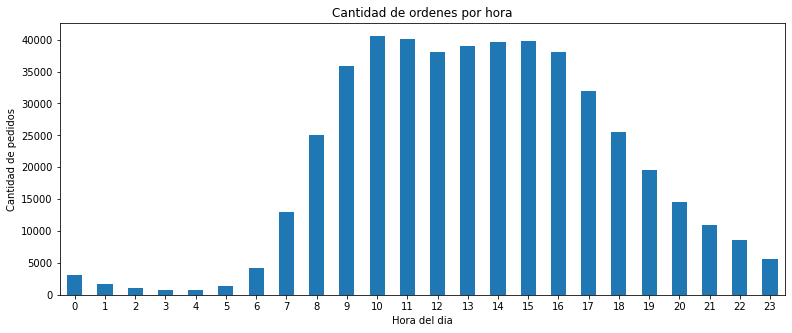

In [37]:
dt_insta_orders["order_hour_of_day"].value_counts().sort_index().plot(kind="bar", figsize=[13, 5], rot="0", title="Cantidad de ordenes por hora", xlabel="Hora del dia", ylabel="Cantidad de pedidos")

Escribe aquí tus conclusiones

Segun nuestra grafica podemos ver que las horas de mayor venta son entre las 9 y las 17, por el contrario las horas de menos ventas son entre las 2 y las 4 donde las ventas son casi nulas.

### [A3] ¿Qué día de la semana compran víveres las personas?

<AxesSubplot:title={'center':'Cantidad de ordenes por dia'}, xlabel='Dia de la semana', ylabel='Cantidad de pedidos'>

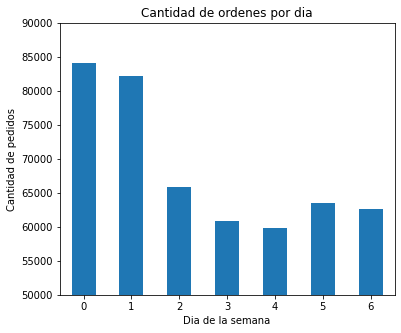

In [38]:
dt_insta_orders["order_dow"].value_counts().sort_index().plot(kind="bar", figsize=[6, 5], rot="0", title="Cantidad de ordenes por dia", xlabel="Dia de la semana", ylabel="Cantidad de pedidos", ylim=[50000, 90000])

Escribe aquí tus conclusiones

En las ventas separadas por dia vemos como destacados los dias domingos y lunes como los dias de mayores ventas con unas 2000 ventas por encima de los demas dias aproximadamente, el resto de dias mantienen un ritmo similar entre si, de al rededor de las 6000 ventas.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

<AxesSubplot:title={'center':'Cantidad de dias hasta el siguiente pedido'}, xlabel='dias', ylabel='Cantidad de pedidos'>

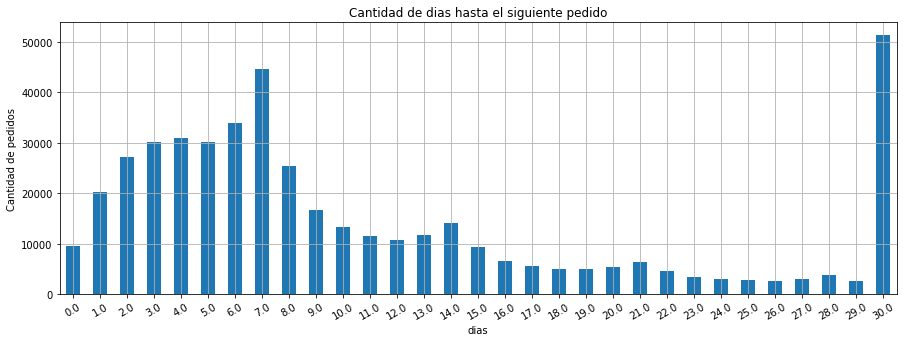

In [39]:
dt_insta_orders["days_since_prior_order"].value_counts().sort_index().plot(kind="bar", figsize=[15, 5], rot="30", title="Cantidad de dias hasta el siguiente pedido", xlabel="dias", ylabel="Cantidad de pedidos", grid=True)

Escribe aquí tus conclusiones

Segun los analisis realizados podemos deducir que los dias en los que mas se realizan compras son los dias domingo y lunes y los dias con menos compra son los miercoles y jueves.

Las horas mas frecuentes en las que se realizan las compras son entre las 10 y las 16. Siendo las mas bajas del dia entre las 2 y las 4 de la tarde.

Y la cantidad transcurrida de dias para realizar un pedido nuevemente tiene dos picos, que serian luego de 7 dias y 30 dias, siendo 30 dias el mas comun entre los usuarios que compraron nuevamente. 

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

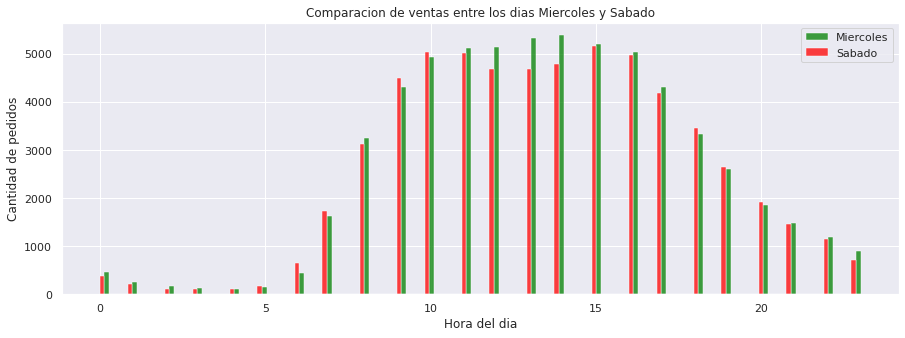

In [40]:
# Set the aesthetic style of the plots
sns.set()

# Filter the DataFrame to include only rows where "order_dow" is 3 or 6
wed_sat_df = dt_insta_orders[(dt_insta_orders["order_dow"] == 3) | (dt_insta_orders["order_dow"] == 6)]

# Define a color palette as a dictionary. Here, 3 will be red and 6 will be green
color_dict = {3: 'red', 6: 'green'}

# size
fig, ax = plt.subplots(figsize = (15, 5))

# Create the histogram plot
sns.histplot(wed_sat_df, x="order_hour_of_day", hue="order_dow", palette=color_dict, multiple="dodge").set_title("Comparacion de ventas entre los dias Miercoles y Sabado")

# Rename axes
ax.set(xlabel="Hora del dia", ylabel="Cantidad de pedidos")

# Rename legends
plt.legend(labels=["Miercoles","Sabado"])


Escribe aquí tus conclusiones


Podemos ver que los comportamientos de los dias miercoles y sabados son bastante parecidos entre si, sin embargo el sabado tiende a ser un poco mejor para las ventas, especialmente entre las 11 y 14 horas del dia, y el miercoles a su vez es ligeramente mejor que el sabado entre las 9 y las 10.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

<AxesSubplot:title={'center':'Grafica de distribucion para el numero de ordenes'}, ylabel='Frequency'>

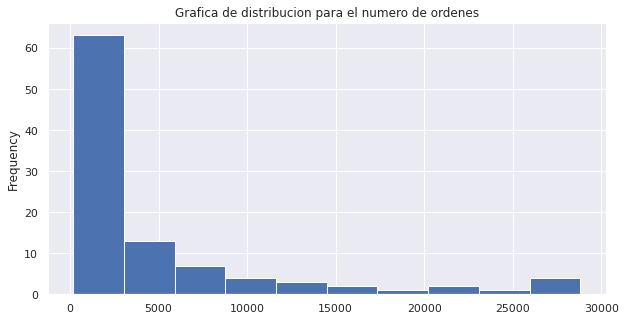

In [41]:
dt_insta_orders["order_number"].value_counts().sort_index().plot(kind="hist", figsize=[10, 5], ylabel="Frecuencia de compras", title="Grafica de distribucion para el numero de ordenes")

Escribe aquí tus conclusiones


En nuestro histograma podemos ver que solo un pequeño porcentaje de nuestros clientes llegan a nuestro punto mas alto que es alrededor de las 60 compras, aproximadamente unos 2500 clientes, a partir de aqui la repeticion de las compras baja notablemente siendo el valor mas cercano apenas de unas 12 repeticiones, y solo un promedio de unos 5000 clientes.

para el resto de la grafica los numeros son bastante bajos con respecto a estos dos primeros ya que solo cerca de 12000 usuarios compraron en 5 oportunidades y la gran mayoria mucho menos de eso.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
top_20 = data_orders_products.query("order_id")["product_id"].value_counts().head(20).reset_index()
top_20.columns=["product_id", "num_orders"]
top_20.merge(data_products[["product_name", "product_id"]], how="left", on="product_id")

,product_id,num_orders,product_name
0,24852,66076,Banana
1,13176,51314,Bag of Organic Bananas
2,21137,36791,Organic Strawberries
3,21903,33967,Organic Baby Spinach
4,47209,29599,Organic Hass Avocado
5,47766,24404,Organic Avocado
6,47626,22053,Large Lemon
7,26209,20308,Limes
8,16797,19999,Strawberries
9,27845,19187,Organic Whole Milk


Escribe aquí tus conclusiones

Podemos ver en los datos anteriores que el producto mas vendido y por mucho es la banana, adicionalmente podemos ver que los productos organicos tienen una buena preferencia, junto con algunas frutas y verduras.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

<AxesSubplot:title={'center':'Cantidad de artículos por pedido'}, xlabel='Cantidad de articulos', ylabel='Pedidos por cliente'>

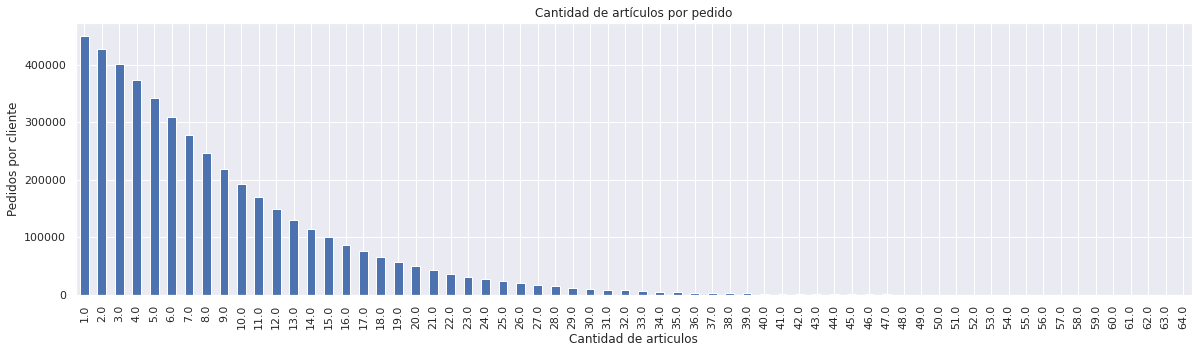

In [43]:
data_orders_products["add_to_cart_order"].value_counts().plot(kind="bar", figsize=[20,5], title="Cantidad de artículos por pedido", xlabel="Cantidad de articulos", ylabel="Pedidos por cliente")

Escribe aquí tus conclusiones


Este grafico podemos dividirlo en 4 partes para responder a la pregunta que nos han hecho.
A este primer grupo le llamaremos "Clientes Bronce", es el mayor grupo de personas, este grupo solo compran entre 1 y 6 articulos en cada compra.
El segundo grupo, lo llamaremos "Clientes plata" que sigue siendo un grupo importante de personas, solo que no tan grande como el primer grupo mencionado.
En este grupo veremos a las personas que realizan entre 7 y 17 compras.
El tercer grupo es mas selecto ya que es el grupo que compra la mayor cantidad de articulos en cada pedido de los primeros 3 grupos, este grupo podemos llamarlo grupo "Gold". 
Ya que realizan compras de entre 18 y 37 articulos en cada pedido.
Y por ultimo el grupo de clientes mas destacados que llamaremos "clientes platinium" son un muy pequeño grupo una minoria, pero estos clientes realizan compras de entre 38 y 64 articulos.
haciendo que sea nuestro mejor cliente. Lamentablemente son muy pocos los clientes de esta seccion.


Nuestro grafico tambien nos muestra que el promedio de compra de los clientes es de entre 9 y 10 productos en cada pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [44]:

top_20_reordered = data_orders_products.query("reordered == 1")["product_id"].value_counts().head(20).reset_index()
top_20_reordered.columns=["product_id", "num_orders"]
top_20_reordered.merge(data_products[["product_name", "product_id"]], how="left", on="product_id")

,product_id,num_orders,product_name
0,24852,55763,Banana
1,13176,44450,Bag of Organic Bananas
2,21137,28639,Organic Strawberries
3,21903,26233,Organic Baby Spinach
4,47209,23629,Organic Hass Avocado
5,47766,18743,Organic Avocado
6,27845,16251,Organic Whole Milk
7,47626,15044,Large Lemon
8,27966,14748,Organic Raspberries
9,16797,13945,Strawberries


Escribe aquí tus conclusiones

Como era de esperarse el top 20 de los productos que vuelven a pedirse, son en un 90% los productos que se ven en el primer listado de top20 de productos mas pedidos, a excepcion de los dos ultimos que no aparecen en el anterior listado.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [45]:
conteo = data_orders_products.groupby("product_id").agg(recuento=("product_id", "count"), recompras=("reordered", "sum"))

In [46]:
conteo["porc"] = (conteo['recompras'] / conteo['recuento']) * 100
conteo[conteo["recompras"] > 1].sort_values(by="recompras", ascending=False).head(40)


,recuento,recompras,porc
product_id,,,
24852,66050,55763,84.425435
13176,53297,44450,83.400567
21137,37039,28639,77.321202
21903,33971,26233,77.221748
47209,29773,23629,79.363853
47766,24689,18743,75.916400
27845,19600,16251,82.913265
47626,21495,15044,69.988369
27966,19197,14748,76.824504


Escribe aquí tus conclusiones


Ahora podemos ver claramente cuantas veces se compró un producto, cuantas veces se volvio a comprar y el porcentaje de recompra.
Tenemos muchos articulos donde el porcentaje es del 100% esto debido a que las compras son bajas, he organizado el cuadro de forma en que los productos mas recomprados queden en la punta y asi saber cuales son los que tienen mas salida. Donde la banana ocupa el numero 1

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

<AxesSubplot:title={'center':'Proporcíon de productos reordenados'}, ylabel='Frequency'>

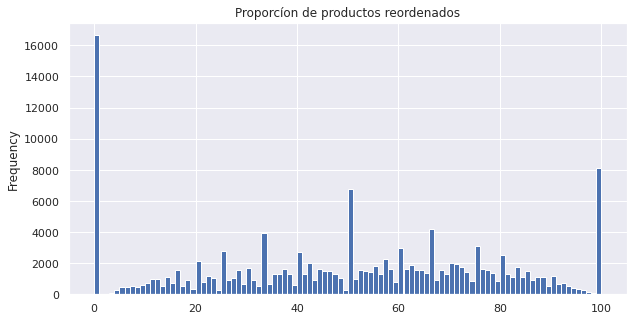

In [47]:
reordered = data_orders_products.merge(dt_insta_orders[["user_id", "order_id"]], how="left", on="order_id")
reordered_by_user = reordered.groupby("user_id").agg(recuento=("product_id", "count"), recompras=("reordered", "sum"))
reordered_by_user
reordered_porc = (reordered_by_user["recompras"] / reordered_by_user["recuento"]) * 100
reordered_porc.sort_values(ascending=False).plot(kind="hist", title="Proporcíon de productos reordenados", figsize=[10,5], bins=100)
#dividir el numero de productos reordenador entre el numero total de ordenados

Escribe aquí tus conclusiones


Hemos almacenado el porcentaje solicitado en la variable "reordered_porc" ahora podemos saber el porcentaje individual de recompra para cada usuario.


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [48]:
top_first_20 = data_orders_products.query("add_to_cart_order == 1")[["product_id"]].value_counts().reset_index().head(20)
top_first_20.columns=["product_id", "count"]
top_first_20 = top_first_20.merge(data_products[["product_id", "product_name"]], how="left", on="product_id")



top_first_20

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


Escribe aquí tus conclusiones


Ahora vemos los primeros 20 articulos en ser ordenados en primer lugar por los usuarios y usuarias
